In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sb

In [2]:
import tensorflow
import keras
from keras.datasets import mnist
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

# As images are encoded as number or pixel value in the file we have to split input and target variable        

In [4]:
x_train_fashion=fashion_train.drop('label',axis=1)
y_train_fashion=fashion_train[['label']]
x_test_fashion=fashion_test.drop('label',axis=1)
y_test_fashion=fashion_test[['label']]

In [5]:
x_train_fashion.shape

(60000, 784)

In [6]:
print(type(y_train_fashion))

<class 'pandas.core.frame.DataFrame'>


# As fashion is in we don't want preprocess it to convert it into 2D for ANN input

# Displying images for just reference
 As input is in 2D we have to convert it into 3D i.e 28 * 28 fro displaying

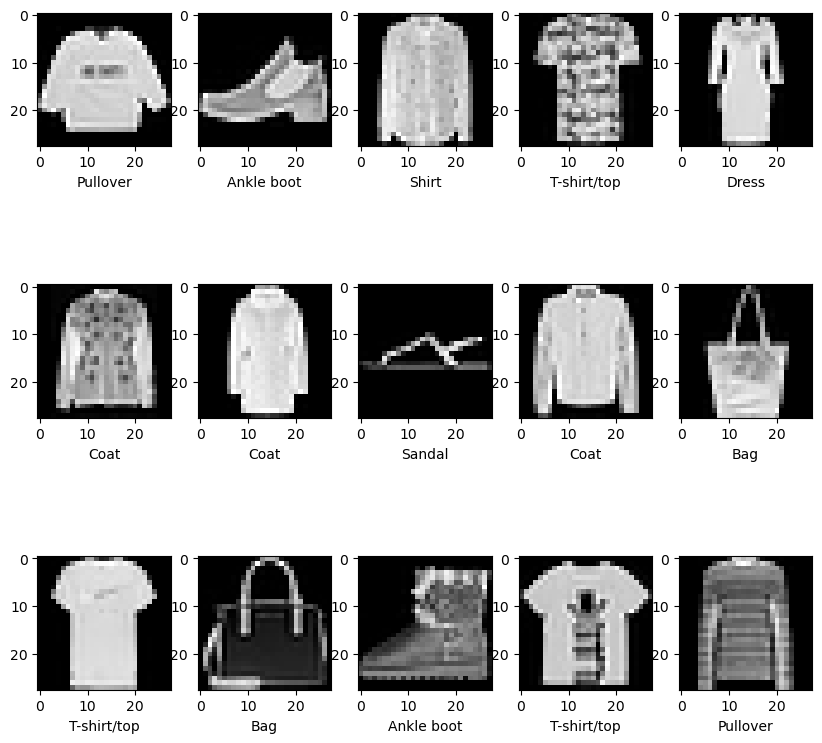

In [7]:
x_train_reshape=x_train_fashion.values.reshape(-1,28,28)
y_train_val=y_train_fashion.values
col_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_train_reshape[i],cmap='gray')
    plt.xlabel(col_names[y_train_val[i][0]])
plt.show()

# output preprocessing

In [8]:
y_train_fashion=to_categorical(y_train_fashion,num_classes=10)
y_test_fashion=to_categorical(y_test_fashion,num_classes=10)

#model Creation

In [9]:
model=Sequential([
                  layers.Dense(128,activation='relu',input_shape=(784,)),
                  layers.Dense(64,activation='relu'),
                  layers.Dense(64,activation='relu'),
                  layers.Dense(10,activation='sigmoid')])

C:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,546 (443.54 KB)

 Trainable params: 113,546 (443.54 KB)

 Non-trainable params: 0 (0.00 B)

# Param Calculation

   OUtput channel * (input cahnnel + 1)
dense_3 128 * (784 +1) = 100480
dense_4 64 * (128 + 1) = 8256
dense_5 64 * (64 + 1) = 4160
dense_6 10 * (64 + 1) = 650

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
ANN_fashion=model.fit(x_train_fashion,y_train_fashion,batch_size=100,epochs=10,validation_data=(x_test_fashion,y_test_fashion))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6021 - loss: 5.7888 - val_accuracy: 0.7874 - val_loss: 0.7108
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8045 - loss: 0.5943 - val_accuracy: 0.8289 - val_loss: 0.5199
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8294 - loss: 0.4772 - val_accuracy: 0.8202 - val_loss: 0.4852
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8345 - loss: 0.4299 - val_accuracy: 0.8310 - val_loss: 0.4309
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8414 - loss: 0.3897 - val_accuracy: 0.8300 - val_loss: 0.4349
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8457 - loss: 0.3744 - val_accuracy: 0.8159 - val_loss: 0.4072
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8446 - loss: 0.3732 - val_accuracy: 0.7859 - val_loss: 0.4234
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8316 - loss: 0.3544 - val_accuracy: 0.

In [13]:
y_predict=model.predict(x_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


#output reversing


In [14]:
y_test_fashion=np.argmax(y_test_fashion,axis=1)
y_predict_fashion=np.argmax(y_predict,axis=1)

In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: >

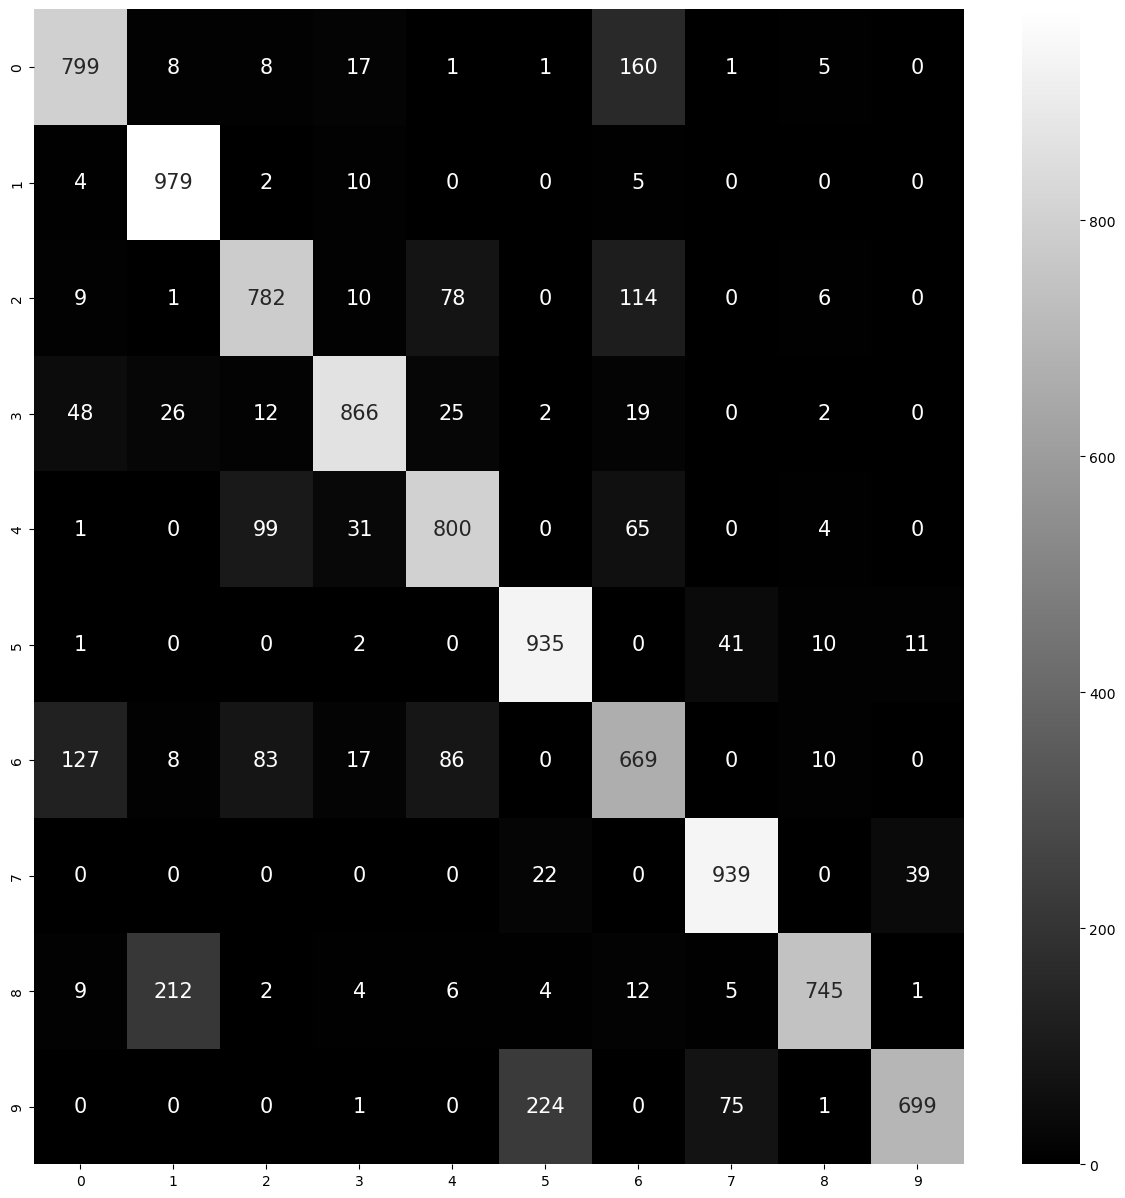

In [20]:
con_mat=confusion_matrix(y_test_fashion,y_predict_fashion)
plt.figure(figsize=(15,15))
plt.style.use('seaborn-v0_8-bright')
sb.heatmap(con_mat,annot=True,annot_kws={'size':15},fmt='d',cmap='gray')

In [23]:
class_report=classification_report(y_test_fashion,y_predict_fashion)
print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.79      0.98      0.88      1000
           2       0.79      0.78      0.79      1000
           3       0.90      0.87      0.88      1000
           4       0.80      0.80      0.80      1000
           5       0.79      0.94      0.85      1000
           6       0.64      0.67      0.65      1000
           7       0.89      0.94      0.91      1000
           8       0.95      0.74      0.84      1000
           9       0.93      0.70      0.80      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



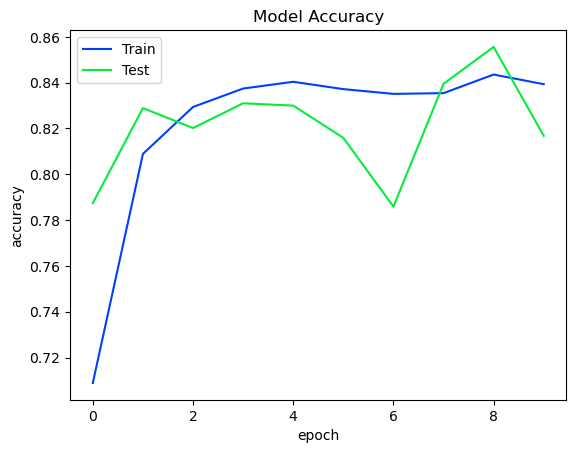

In [29]:
plt.plot(ANN_fashion.history['accuracy'])
plt.plot(ANN_fashion.history['val_accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Model Accuracy")
plt.legend(['Train','Test'],loc='best')
plt.show()

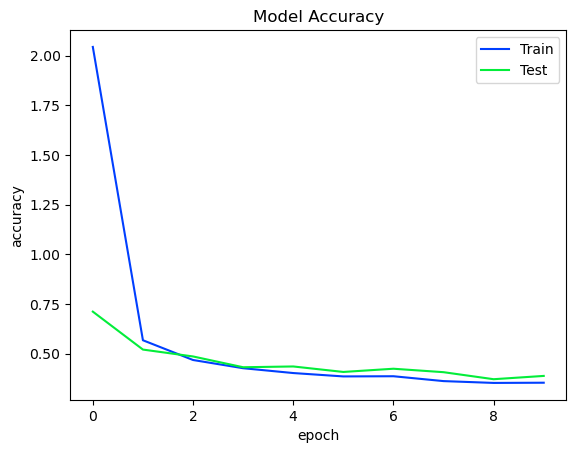

In [30]:
plt.plot(ANN_fashion.history['loss'])
plt.plot(ANN_fashion.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Model Accuracy")
plt.legend(['Train','Test'],loc='best')
plt.show()

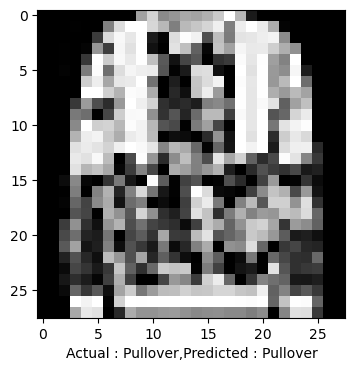

In [50]:
x_test_reshape=x_test_fashion.values.reshape(-1,28,28)
plt.figure(figsize=(4,4))
plt.imshow(x_test_reshape[3],cmap='gray')
plt.xlabel("Actual : {},Predicted : {}".format(col_names[y_test_fashion[3]],col_names[y_predict_fashion[3]]))
plt.show()